### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X-ek és hozzájuk tartozó logaritmikus y-ok generálása

In [2]:
X = np.linspace(start=2, stop=1000, num=1000)
y = []
for i in range(1000):
    rnd = np.random.randint(0, 2)
    rand = np.random.random()
    if(rnd == 0):
        y.append(np.log(X[i]) + rand)
    else:
        y.append(np.log(X[i]) - rand/2)

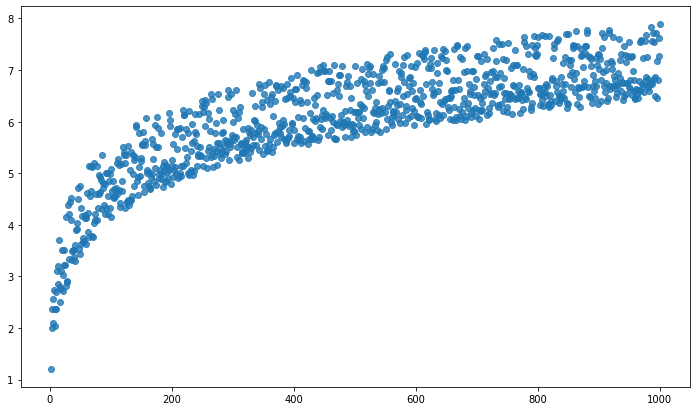

In [23]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

### X-ekből log(X)-ek készítése - log_X

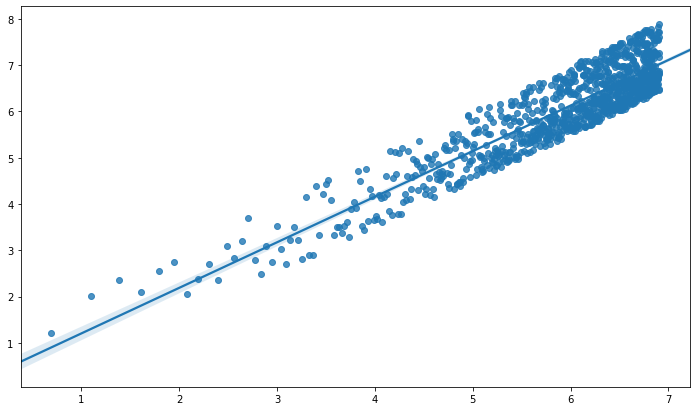

In [18]:
log_X = np.log(X)

plt.figure(figsize=(12, 7))
sns.regplot(x=log_X, y=y)

In [20]:
stats.linregress(np.log(X), y)

LinregressResult(slope=0.9848482519117693, intercept=0.2182482242740651, rvalue=0.9087409848228969, pvalue=0.0, stderr=0.0143177679867221)

### log(X), y-hoz tartozó egyenes együtthatói

#### B1 értéke

In [5]:
számláló = 0
nevező = 0

for a, b in zip(log_X, y):
    számláló += (a-np.mean(log_X))*(b-np.mean(y))  #B1 számlálója:  SUM[ (Xi - X_átlag)*(Yi-Y_átlag) ]
    nevező += (a-np.mean(log_X))**2                #B1 nevezője:   (Xi-X_átlag)**2
    
B1 = számláló/nevező
print('B1: ', B1)

B1:  0.9848482519117676


#### B0 értéke

In [6]:
B0 = np.mean(y)-B1*np.mean(log_X)                 #B0: Y_átlag - B1*Xátlag
print('B0: ', B0)

B0:  0.21824822427407575


### log(X), y-hoz tartozó egyenes ábrázolása

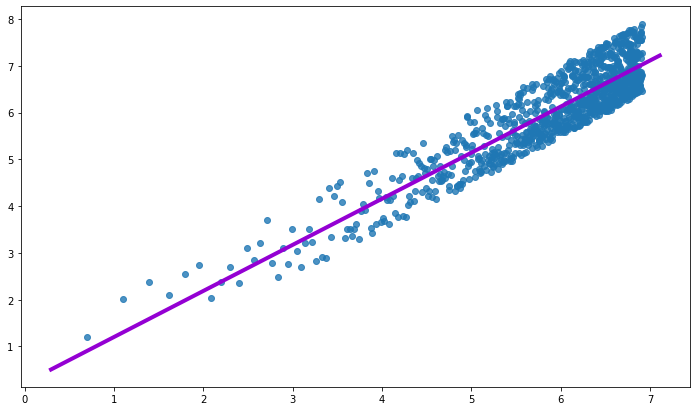

In [39]:
plt.figure(figsize=(12, 7))
plt.scatter(log_X, y, alpha=0.8)

vonal_x = np.linspace(np.min(log_X)-0.4, np.max(log_X)+0.2, 2)
vonal_y = (B0 + B1*vonal_x)

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=4,)
plt.show()

### Logaritmikus görbe ábrázolása Y = B0 + log(B1*X)

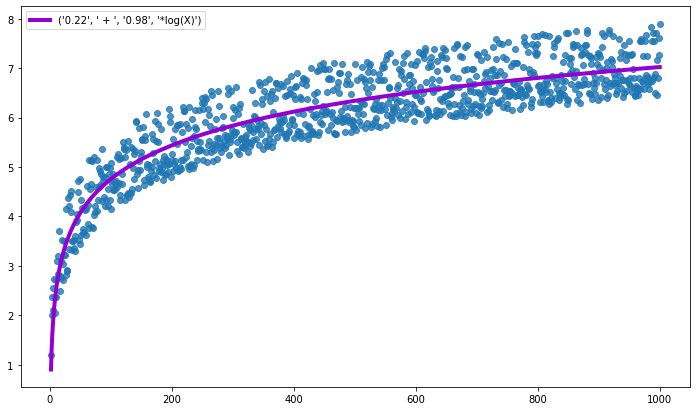

In [42]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)


plt.plot(X, B0 + B1*np.log(X), c='darkviolet', linewidth=4, label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), '*log(X)')) #Y = B0 + log(B1*X)
plt.legend()

plt.show()

### Prediction

In [9]:
def log_predict(x):
    return B0 + B1*np.log(x)

log_predict(200)

5.436286820792669

### R^2

In [10]:
from sklearn.metrics import r2_score

ylog_predicted = list(map(log_predict, X))
print('R^2: ', r2_score(y, ylog_predicted)) #(tényleges, predicted)

R^2:  0.8258101774968887


###   
###   
### Másik módszer - scipy curve_fit

In [11]:
from scipy.optimize import curve_fit 

def log(x, a, b): 
    return a*np.log(b*x) 
  
param, param_cov = curve_fit(log, X, y) 

print('B0: ', param[0])
print('B1: ', param[1])

B0:  0.9848482568406893
B1:  1.248079425633226


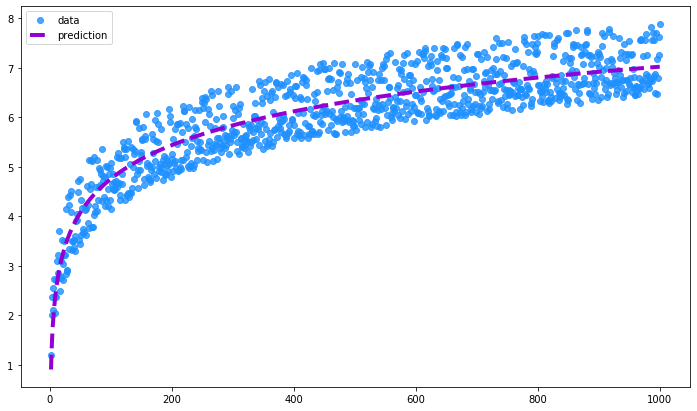

In [47]:
ans = (param[0]*(np.log(param[1]*X)))

plt.figure(figsize=(12, 7))
plt.plot(X, y, 'o', color ='dodgerblue', label ="data", alpha=0.8)
plt.plot(X, ans, '--', color ='darkviolet', linewidth=4, label ="prediction")

plt.legend()
plt.show()